# Projeto Integrador II

In [81]:
pkg load control
dataLog100 = csvread("output_ds_100.csv");
dataLog80 = csvread("output_ds_80.csv");
dataLog60 = csvread("output_ds_60.csv");
dataLog40 = csvread("output_ds_40.csv");

t_100 = dataLog100(:,1);
T_100 = dataLog100(:,2);

t_80 = dataLog80(:,1);
T_80 = dataLog80(:,2);

t_60 = dataLog60(:,1);
T_60 = dataLog60(:,2);

t_40 = dataLog40(:,1);
T_40 = dataLog40(:,2);

s = tf('s');

#Integrador 2
tau_int = 173.2115294950208
temp_max = 103-22.25
tempInit100 = dataLog100(1,2)
tempInit80 = dataLog80(1,2)
tempInit60 = dataLog60(1,2)
tempInit40 = dataLog40(1,2)
tensao_arduino = 5

tau_int =  173.21
temp_max =  80.750
tempInit100 =  23.870
tempInit80 =  23.940
tempInit60 =  24.310
tempInit40 =  24.440
tensao_arduino =  5


K_int =  13.257

Transfer function 'Gs_int' from input 'u1' to output ...

         13.26   
 y1:  -----------
      173.2 s + 1

Continuous-time model.
Comparacao 100%


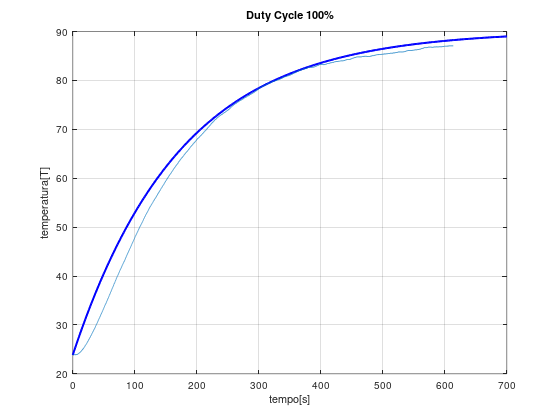

In [82]:
#INTEGRADOR 2

K_int = 13.257407407434142
Gs_int = tf([K_int], [tau_int, 1])

#step(tempInit100+5*Gs_int,tempInit80+4*Gs_int,tempInit60+3*Gs_int,tempInit40+2*Gs_int, 700, 2);
disp("Comparacao 100%")
figure (1)
[a, b, c] = step(tempInit100+5*Gs_int, 700, 2);
plot(b, a, "linewidth", 2, 'b')
hold on
plot(t_100/1000, T_100)
title("Duty Cycle 100%")
xlabel('tempo[s]');
ylabel('temperatura[T]');
grid on
hold off





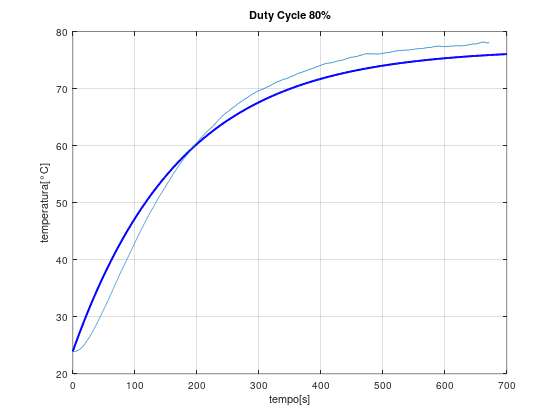

In [83]:
[a, b, c] = step(tempInit80+4*Gs_int, 700, 2);
figure (2)
plot(b, a, "linewidth", 2, 'b')
hold on

plot(t_80/1000, T_80)

title("Duty Cycle 80%")
xlabel('tempo[s]');
ylabel('temperatura[°C]');
grid on
hold off

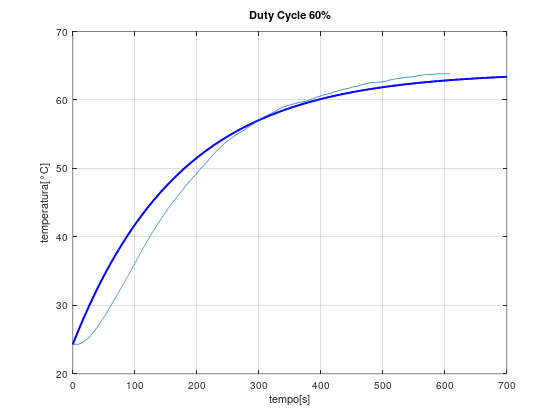

In [84]:
[a, b, c] = step(tempInit60+3*Gs_int, 700, 2);
figure (3)
plot(b, a, "linewidth", 2, 'b')
hold on

plot(t_60/1000, T_60)
title("Duty Cycle 60%")
xlabel('tempo[s]');
ylabel('temperatura[°C]');

grid on
hold off

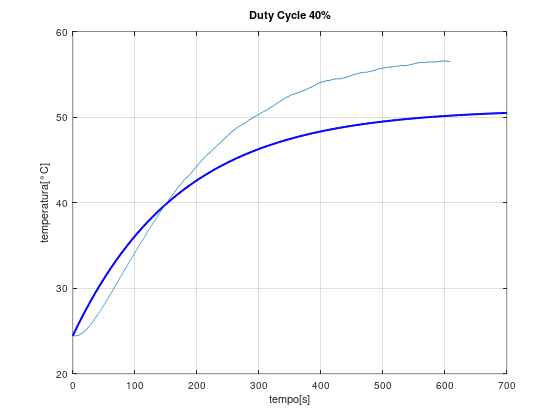

In [85]:
[a, b, c] = step(tempInit40+2*Gs_int, 700, 2);
figure (4)
plot(b, a, "linewidth", 2, 'b')
hold on
plot(t_40/1000, T_40)

title("Duty Cycle 40%")
xlabel('tempo[s]');
ylabel('temperatura[°C]');

grid on
hold off

Ta_int =  692.85
Ts_int =  10
Pss_int =  0.020000
zeta_int =  0.77970
omega_int =  0.0074045
modReal_int =  0.0057733

 Angulo maximo funcao de zeta INTEGRADOR
angMax_int =  38.767


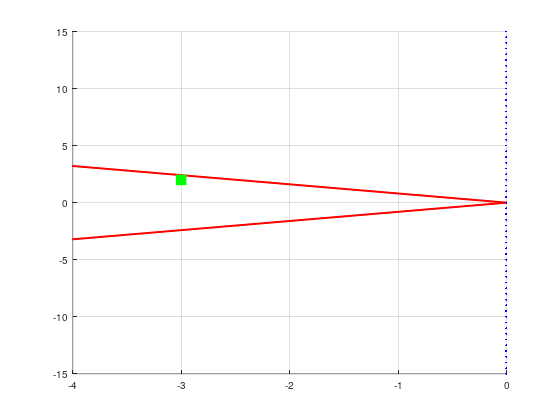

In [86]:
Ta_int = 4*tau_int  #tempo acomodacao
Ts_int = 10 #periodo amostragem = Tacomodação malha aberta / 10

Pss_int = 0.02
zeta_int = sqrt(((log(Pss_int))**2)/(((log(Pss_int))**2)+(pi**2)))
omega_int = 4/(Ta_int*zeta_int)
modReal_int = 4/Ta_int

disp("\n Angulo maximo funcao de zeta INTEGRADOR")
angMax_int = atand(sqrt(1-zeta_int^2)/zeta_int)

sigma = 0:0.5:300;
omega_int = sigma*tand(angMax_int);

figure, hold on
plot(-sigma, omega_int, "linewidth", 2, "r");
plot(-sigma, -omega_int, "linewidth", 2, "r");
plot(-modReal_int, sigma, "linewidth", 4, "b");
plot(-modReal_int, -sigma, "linewidth", 4, "b");
scatter(-3, 2, 100, "g", "s", "filled")
axis ([-4, 0, -15, 15]);
grid on
hold off


Transfer function 'z_int' from input 'u1' to output ...

 y1:  z

Sampling time: 10 s
Discrete-time model.
 
Planta em z por ZOH INTEGRADOR:

Transfer function 'Gz_int' from input 'u1' to output ...

        0.7437  
 y1:  ----------
      z - 0.9439

Sampling time: 10 s
Discrete-time model.
 
Planta em z por transformacao bilinear INTEGRADOR:

Transfer function 'Gzb_int' from input 'u1' to output ...

      0.372 z + 0.372
 y1:  ---------------
        z - 0.9439   

Sampling time: 10 s
Discrete-time model.


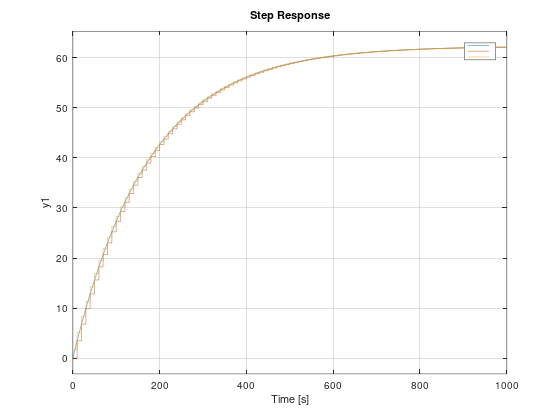

In [87]:
z_int = tf('z', Ts_int)
disp(" \nPlanta em z por ZOH INTEGRADOR:")
Gz_int = c2d(Gs_int, Ts_int, 'zoh')

disp(" \nPlanta em z por transformacao bilinear INTEGRADOR:")
Gzb_int = c2d(Gs_int, Ts_int, 'tustin')

step(4.7*Gs_int, 4.7*Gz_int, 4.7*Gzb_int, 1000)

In [88]:


taumf_int = tau_int/2

kp_int = (1/K_int)*((2*(tau_int/taumf_int))-1)
Ti_int = ((zeta_int^2)*(taumf_int^2)*K_int)/tau_int

disp(" Controlador PI no domínio continuo:")
Cs_int = tf([kp_int*Ti_int, 1],[Ti_int, 0])

disp(" Controlador PI no domínio discreto:")
Cz_bil = c2d(Cs_int, Ts_int, 'tustin')

#utilizar bilinear ou zoh na planta?
disp(" \nFunção de transferência em malha aberta:")
Gmaz_PI = Gzb_int*Cz_bil

disp(" \nFunção de transferência em malha fechada:")
Gmfz_PI = feedback(Gmaz_PI,1)


taumf_int =  86.606
kp_int =  0.22629
Ti_int =  349.01
 Controlador PI no domínio continuo:

Transfer function 'Cs_int' from input 'u1' to output ...

      78.98 s + 1
 y1:  -----------
         349 s   

Continuous-time model.
 Controlador PI no domínio discreto:

Transfer function 'Cz_bil' from input 'u1' to output ...

      0.2406 z - 0.212
 y1:  ----------------
           z - 1      

Sampling time: 10 s
Discrete-time model.
 
Função de transferência em malha aberta:

Transfer function 'Gmaz_PI' from input 'u1' to output ...

      0.0895 z^2 + 0.01066 z - 0.07884
 y1:  --------------------------------
           z^2 - 1.944 z + 0.9439     

Sampling time: 10 s
Discrete-time model.
 
Função de transferência em malha fechada:

Transfer function 'Gmfz_PI' from input 'u1' to output ...

      0.0895 z^2 + 0.01066 z - 0.07884
 y1:  --------------------------------
        1.089 z^2 - 1.933 z + 0.865   

Sampling time: 10 s
Discrete-time model.


y2 =

    26.572
    39.015
    50.088
    59.857
    68.398
    75.798
    82.147
    87.537
    92.061
    95.808
    98.865
   101.314
   103.234
   104.694
   105.762
   106.497
   106.953
   107.180
   107.219
   107.109
   106.883
   106.568
   106.190
   105.769
   105.321
   104.862
   104.402
   103.951
   103.515
   103.101
   102.711
   102.348
   102.015
   101.710
   101.435
   101.188
   100.969
   100.776
   100.608
   100.463
   100.338
   100.232
   100.144
   100.071
   100.012
    99.964
    99.928
    99.900
    99.879
    99.866
    99.858
    99.854
    99.854
    99.857
    99.862
    99.868
    99.876
    99.885
    99.894
    99.903
    99.913
    99.922
    99.930
    99.939
    99.947
    99.954
    99.960
    99.967
    99.972
    99.977
    99.981
    99.985
    99.988
    99.991
    99.994
    99.996
    99.997
    99.999
   100.000
   100.001
   100.002
   100.002
   100.003
   100.003
   100.003
   100.003
   100.003
   100.003
   100.003
   100.003
   1

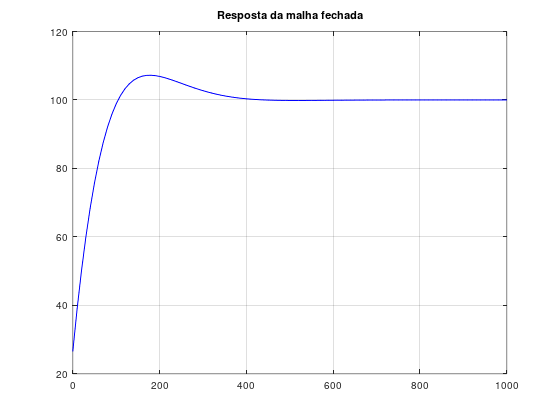

In [89]:

[y2, t2, x2] = step(20+80*Gmfz_PI, 1000,0.1)

plot(t2, y2, "linewidth", 1, 'b')
title("Resposta da malha fechada")
grid on
hold off
